In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# Cargar datos
Purchase_Prices = pd.read_csv('/content/2017PurchasePricesFinal.csv')

In [4]:
Purchase_Prices.shape

(12261, 9)

In [5]:
Purchase_Prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           12261 non-null  int64  
 1   Description     12260 non-null  object 
 2   Price           12261 non-null  float64
 3   Size            12260 non-null  object 
 4   Volume          12260 non-null  object 
 5   Classification  12261 non-null  int64  
 6   PurchasePrice   12261 non-null  float64
 7   VendorNumber    12261 non-null  int64  
 8   VendorName      12261 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 862.2+ KB


In [6]:
Purchase_Prices.head()

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,750mL,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,750mL,750,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,750mL,750,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,750mL,750,1,10.94,7245,PROXIMO SPIRITS INC.


In [9]:
#Análisis Estadístico con Pandas y Numpy: propiedades estadísticas del Dataset.
# Calcula medidas de tendencia central, la media, mediana, desviación estándar, mínimo y máximo
#de cada columna

for i in Purchase_Prices.columns:
    print(i)
    print(Purchase_Prices[i].describe())
    print('---------------------------------')

Brand
count    12261.000000
mean     17989.067123
std      12528.503464
min         58.000000
25%       5990.000000
50%      18788.000000
75%      25117.000000
max      90631.000000
Name: Brand, dtype: float64
---------------------------------
Description
count                    12260
unique                   11114
top       Jagermeister Liqueur
freq                         7
Name: Description, dtype: object
---------------------------------
Price
count    12261.000000
mean        38.640240
std        206.151172
min          0.000000
25%         10.990000
50%         15.990000
75%         29.990000
max      13999.900000
Name: Price, dtype: float64
---------------------------------
Size
count     12260
unique       56
top       750mL
freq       9823
Name: Size, dtype: object
---------------------------------
Volume
count     12260
unique       33
top         750
freq       9840
Name: Volume, dtype: object
---------------------------------
Classification
count    12261.000000
mean      

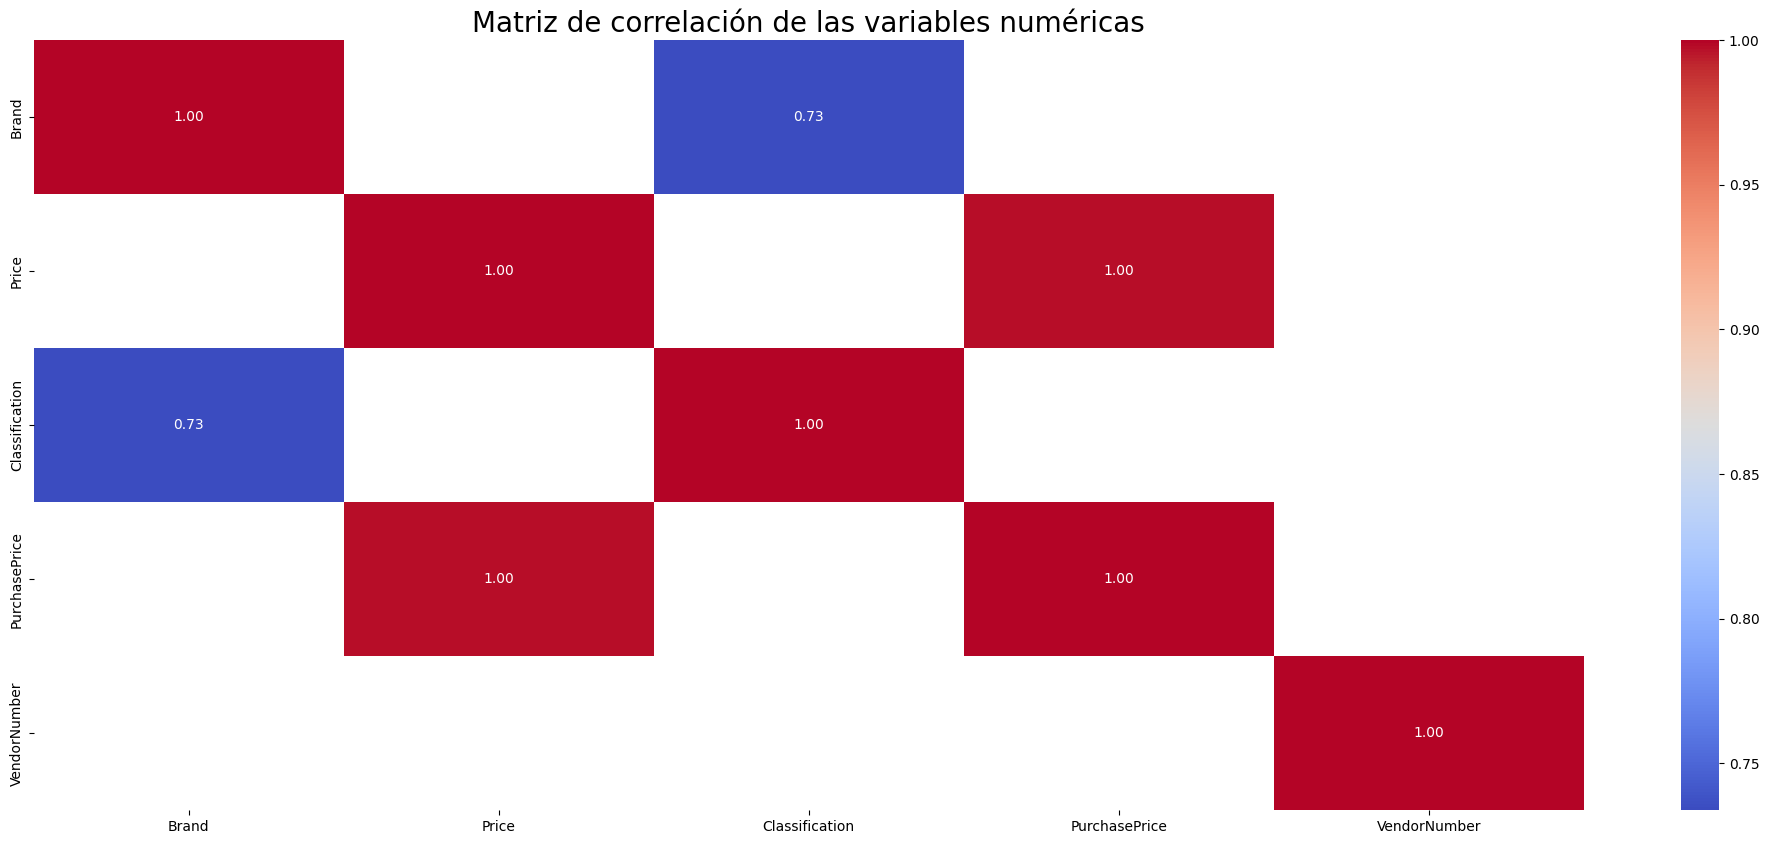

In [10]:
#Se crea la matriz de correlación de las variables numéricas para verificar alguna correlación que permita análisis
numeric_columns = Purchase_Prices.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = Purchase_Prices[numeric_columns].corr()

# Vamos a mostrar valores superiores a 0.5 (donde hay una correlación fuerte) OPCIONAL
correlation_matrix = correlation_matrix[abs(correlation_matrix) > abs(0.5)]

# Se crea la gráfica
plt.figure(figsize=(25, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación de las variables numéricas', fontsize=20)
plt.show()

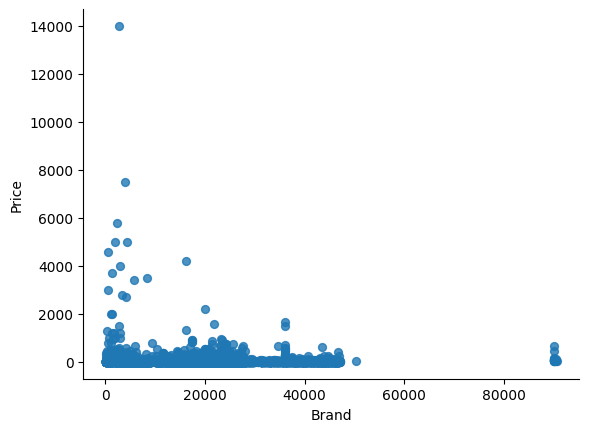

In [8]:
# @title Brand vs Price

from matplotlib import pyplot as plt
Purchase_Prices.plot(kind='scatter', x='Brand', y='Price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

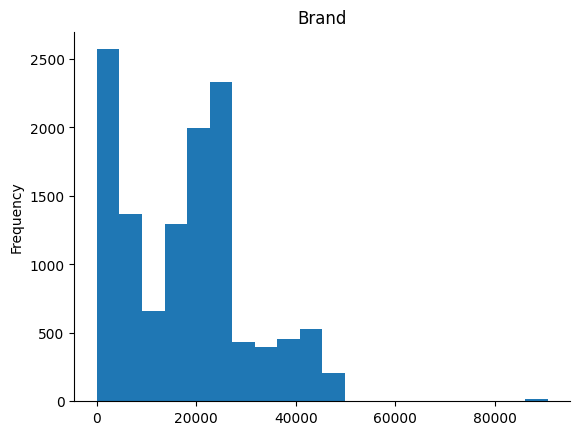

In [7]:
# @title Brand

from matplotlib import pyplot as plt
Purchase_Prices['Brand'].plot(kind='hist', bins=20, title='Brand')
plt.gca().spines[['top', 'right',]].set_visible(False)